## Importing Libaries

In [55]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts of number of classess
import matplotlib.pyplot as plt #used for data Visualization
import seaborn as sns #data visualization library
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report#model performance
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression #Classification ML algorithm
import pickle #Python object hierarchy is converted into a byte stream

## Loading the dataset

In [2]:
data=pd.read_csv("chronickidneydisease.csv") #loading the csv data
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# dataset size
data.shape

(400, 26)

## Data Pre-Processing

In [4]:
data.head() #return you the first 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.tail() #return you the last 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
data.head(10) # return the exact top 10 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


## Dropping id column

In [7]:
data.drop(["id"],axis=1,inplace=True) # drop is used for dropping the column

## Renaming the  Column Names

In [8]:
data.columns #return all the column names

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class'] # manually giving the name  of the columns
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

## Understanding the data type and its summary

In [10]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [38]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [11]:
data.describe() # computes summary values for continous column data

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Observing Target, Categoricl and Numerical Columns 

## Target Column

In [12]:
data['class'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64

In [13]:
data['class']=data['class'].replace("ckd\t","ckd") #replace is used for renaming  
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [14]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object),
 array([11, 14], dtype=int64))

In [15]:
data['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

## Categorical Columns



In [16]:
cat_df=data.select_dtypes('object')
cat_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [17]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values) # only fetch the object type columns
print(catcols)

{'hypertension', 'pus_cell', 'class', 'anemia', 'pus_cell_clumps', 'pedal_edema', 'packed_cell_volume', 'diabetesmellitus', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'appetite', 'red_blood_cell_count', 'white_blood_cell_count'}


In [18]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i])) #using counter for checking the number of classess in the column
    print('*'*120+'\n')

Columns : hypertension
Counter({'no': 251, 'yes': 147, nan: 2})
************************************************************************************************************************

Columns : pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
************************************************************************************************************************

Columns : class
Counter({'ckd': 250, 'notckd': 150})
************************************************************************************************************************

Columns : anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
************************************************************************************************************************

Columns : pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
*******

## Removing the Columns which are not Categorical

In [19]:
catcols.remove('red_blood_cell_count') # remove is used for removing a particular column
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'hypertension', 'pus_cell', 'class', 'anemia', 'pus_cell_clumps', 'pedal_edema', 'diabetesmellitus', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'appetite'}


## Numerical Columns

In [20]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)# only fetech the float and int type columns
#contcols=pd.DataFrame(data,columns=contcols)
print(contcols)

{'potassium', 'age', 'sodium', 'hemoglobin', 'albumin', 'blood_urea', 'blood glucose random', 'serum_creatinine', 'sugar', 'blood_pressure', 'specific_gravity'}


In [21]:
for i in contcols:
    print("Continous Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns : potassium
Counter({5.0: 30, 3.5: 30, 4.9: 27, 4.7: 17, 4.8: 16, 4.0: 14, 4.2: 14, 4.1: 14, 3.8: 14, 3.9: 14, 4.4: 14, 4.5: 13, 3.7: 12, 4.3: 12, 3.6: 8, 4.6: 7, 3.4: 5, 5.2: 5, 5.7: 4, 5.3: 4, 3.2: 3, 5.5: 3, 2.9: 3, 5.4: 3, 6.3: 3, 3.3: 3, 2.5: 2, 5.8: 2, 5.9: 2, 5.6: 2, 3.0: 2, 6.5: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.4: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, 39.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 7.6: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 47.0: 1, nan: 1, 5.1: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2.8: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2.7: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, n

## Removing the Columns which are not Numerrical

In [22]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


{'potassium', 'age', 'sodium', 'hemoglobin', 'blood_urea', 'blood glucose random', 'serum_creatinine', 'blood_pressure'}


### Adding columns which we found Continuous

In [23]:
contcols.add('red_blood_cell_count') # using add we can add the column
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'potassium', 'white_blood_cell_count', 'age', 'sodium', 'hemoglobin', 'blood_urea', 'red_blood_cell_count', 'blood glucose random', 'packed_cell_volume', 'serum_creatinine', 'blood_pressure'}


### Adding columns which we found Categrical

In [24]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'hypertension', 'pus_cell', 'class', 'anemia', 'albumin', 'sugar', 'pus_cell_clumps', 'pedal_edema', 'diabetesmellitus', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'appetite', 'specific_gravity'}


### Rectifying the Categorical Columns Classes

In [25]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no') # replacing \tno with no
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [26]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

## Null Values

In [27]:
data.isnull().any() #it will return true if any columns is having null values

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [28]:
data.isnull().sum() #returns the count of null values present in each column

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

## Converting the column into numeric type

In [30]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

## Handling Continous/numerical columns Null values

In [31]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [32]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

In [33]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

## Labeling Encoding of Categorical Column

In [34]:
#'specific_gravity','albumin', 'sugar'(as these columns are  numerical it is removed)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
 'hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] #only considered the text class columns

In [35]:
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
for i in catcols: #looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder() # creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i])# trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

# Data Visualization

### Age vs Blood Pressure

Text(0.5, 1.0, 'age VS blood Scatter Plot')

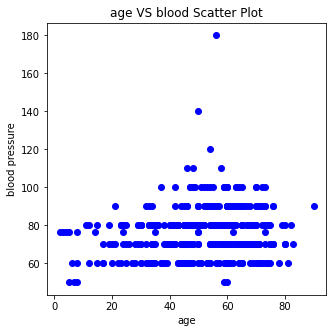

In [36]:
import matplotlib.pyplot as plt # import the matplotlib libaray 
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue') 
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the axes


### Age vs all continous columns

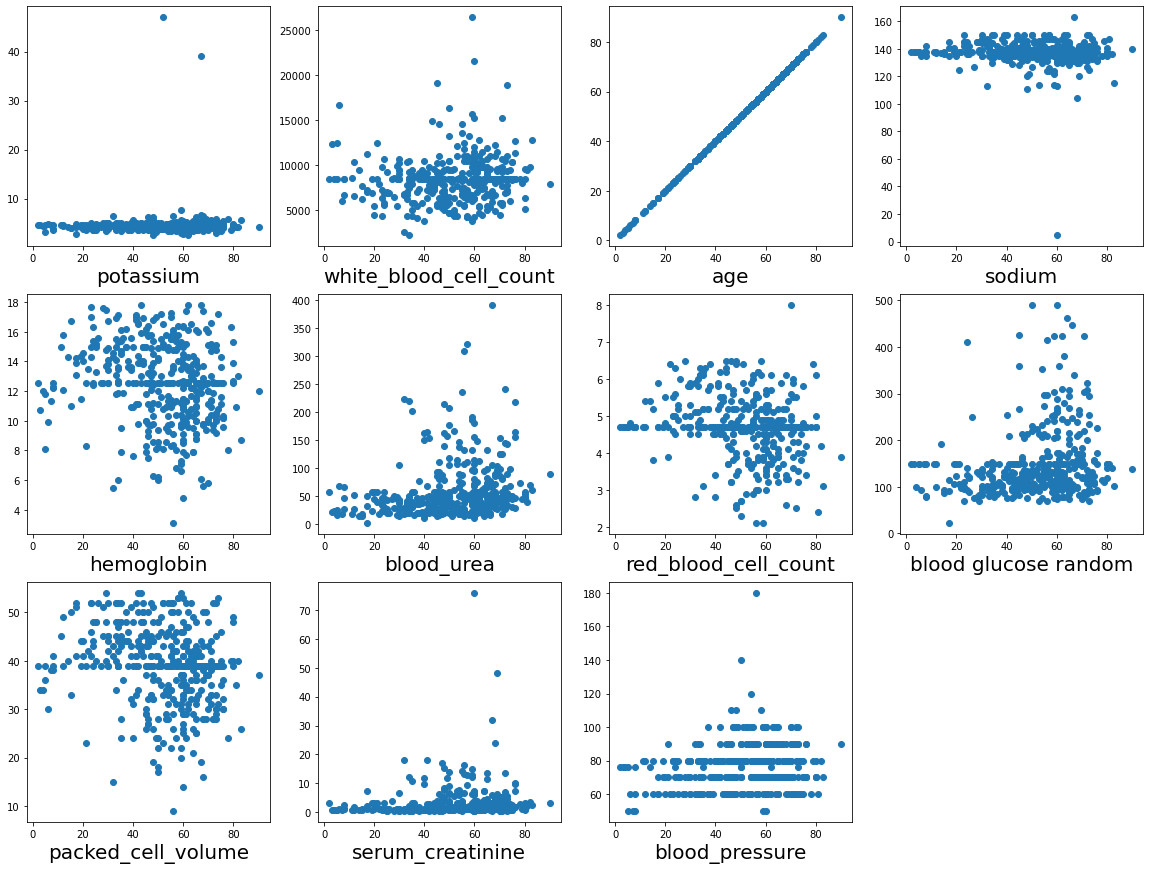

In [37]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :     # as there are 11 continous columns in the data
        ax = plt.subplot(3,4,plotnumber) # 3,4 is refer to 3X4 matrix
        plt.scatter(data['age'],data[column]) #plotting scatter plot
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Finding correlation between the independent Columns

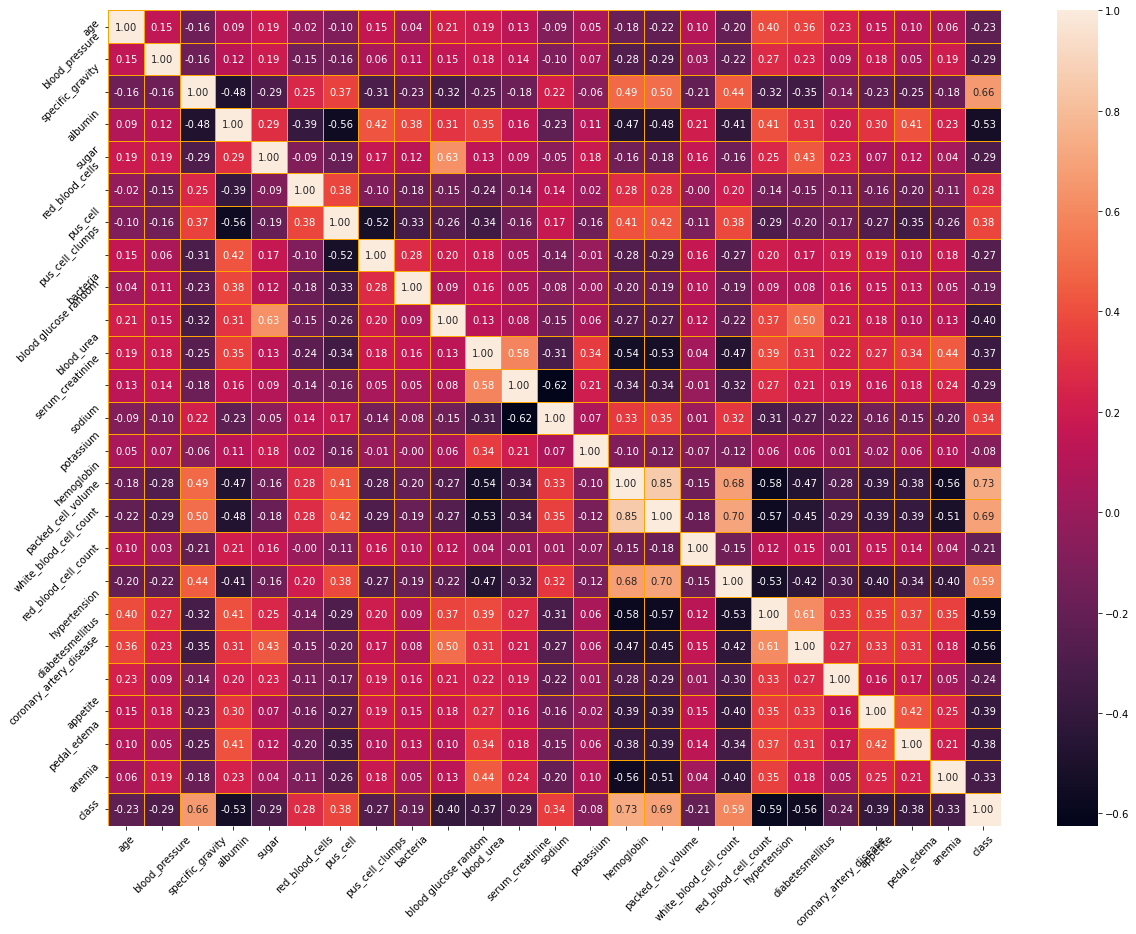

In [38]:
#HEAT MAP #correlation of parameters 
f,ax=plt.subplots(figsize=(20,15)) 
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Class

C:\Users\Smart Bridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

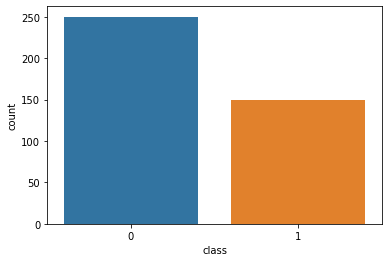

In [39]:
sns.countplot(data['class'])

## Creating Independent and Dependent 

In [40]:
selcols=['red_blood_cells','pus_cell', 'blood glucose random','blood_urea',
            'pedal_edema', 'anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)


(400, 8)
(400, 1)


In [47]:
x.head()

,red_blood_cells,pus_cell,blood glucose random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1,1,121.000000,36.0,0,0,1,0
1,1,1,148.036517,18.0,0,0,0,0
2,1,1,423.000000,53.0,0,1,1,0
3,1,0,117.000000,56.0,1,1,0,0
4,1,1,106.000000,26.0,0,0,0,0


In [48]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


### Splitting the data into train and test

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#train test split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


# Building a Machine Learning Model

## LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train, y_train)
y_predict1=model1.predict(x_test)
logi=accuracy_score(y_test, y_predict1)
logi

C:\Users\Smart Bridge\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smart Bridge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.925

## Confustion Matrix of our model

In [53]:
conf_mat = confusion_matrix(y_test,y_predict1)
conf_mat

array([[48,  6],
       [ 0, 26]], dtype=int64)

## Classification report

In [56]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        54
           1       0.81      1.00      0.90        26

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



## RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train, y_train)
y_predict2=model2.predict(x_test)
rfc1=accuracy_score(y_test,y_predict2)
rfc1

C:\Users\SMARTB~1\AppData\Local\Temp/ipykernel_7932/2789949157.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train, y_train)


0.95

## Confusion matrix

In [59]:
conf_mat = confusion_matrix(y_test,y_predict2)
conf_mat

array([[52,  2],
       [ 2, 24]], dtype=int64)

## classification report

In [60]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



## Dumping our model in pickle form

In [61]:

pickle.dump(model1, open('CKD.pkl','wb'))

In [62]:
pickle.dump(model2, open('Rf.pkl','wb'))